<a href="https://colab.research.google.com/github/MarielaBulbarela/Inteligencia_Artificial_y_Redes_Neuronales/blob/main/Actividades/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MARIELA BULBARELA VAZQUEZ 2109277 CLASE:N1

Actividad 6: Redes neuronales.

Entrenamiento de Red Neuronal Convolucional.

In [1]:
#1. Cargar librerias
import tensorflow  as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
#2. Cargar datos
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#3. Procesamiento de datos
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

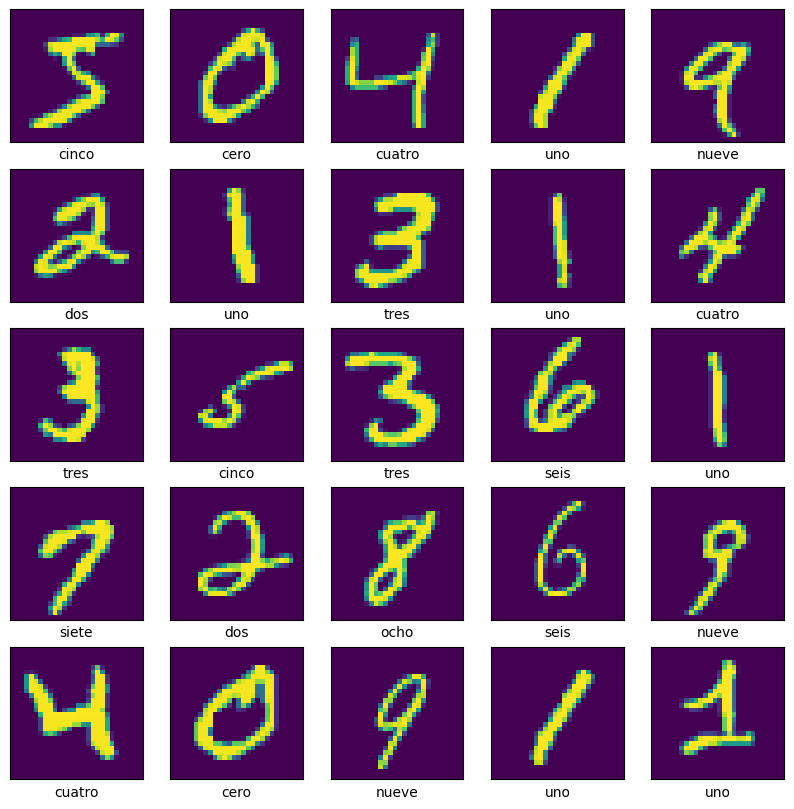

In [7]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'cinco', 'seis', 'siete', 'ocho', 'nueve']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
#4. Selección y entrenamiento del modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 60s 31ms/step - loss: 0.1409 - accuracy: 0.9574 - val_loss: 0.0396 - val_accuracy: 0.9871
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0250 - accuracy: 0.9916 - val_loss: 0.0320 - val_accuracy: 0.9903
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0285 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0351 - val_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0308 - val_accura

313/313 - 3s - loss: 0.0391 - accuracy: 0.9907 - 3s/epoch - 9ms/step


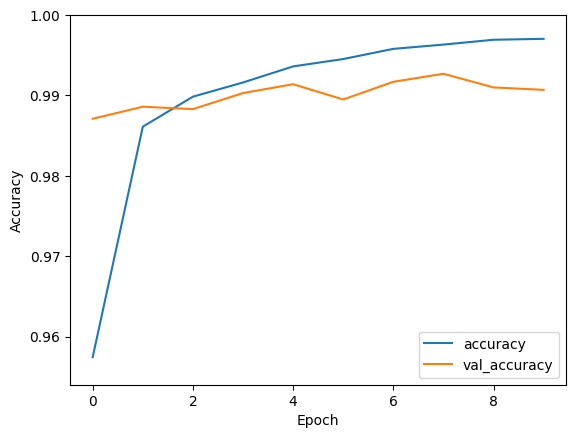

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.954, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.9907000064849854


In [13]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [15]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
      dtype=float32)

In [16]:
predictions = model.predict(test_images)

for i in range(5):
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    print("Predicción:", predicted_label.numpy(), "| Valor real:", true_label)

313/313 [==============================] - 6s 18ms/step
Predicción: 7 | Valor real: 7
Predicción: 2 | Valor real: 2
Predicción: 1 | Valor real: 1
Predicción: 0 | Valor real: 0
Predicción: 4 | Valor real: 4


In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

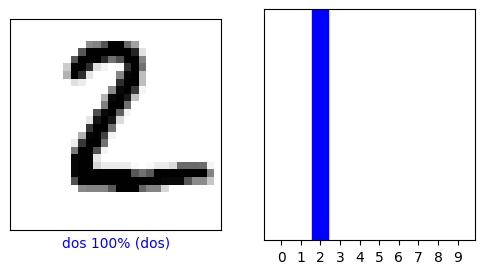

In [18]:
#5. Prueba de modelo
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

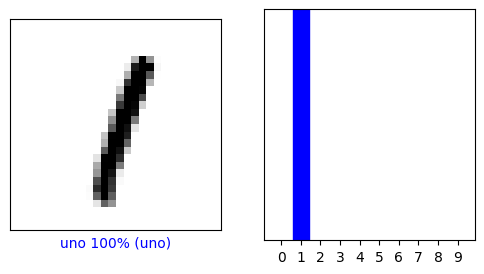

In [19]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

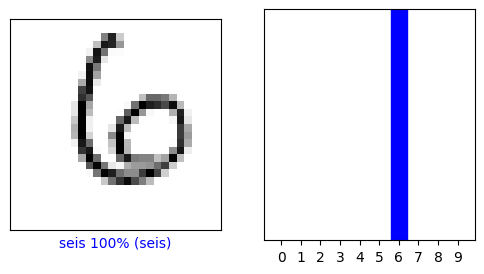

In [20]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

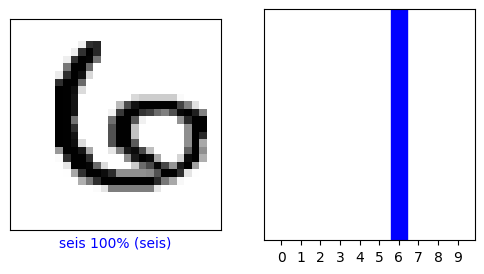

In [21]:
i = 54
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

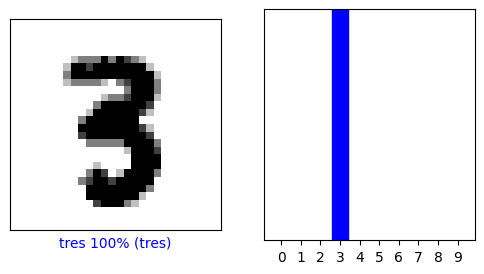

In [22]:
i = 68
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

**¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?**

10 epocas que fueron las mismas en comparacion de la actividad anterior pero teniendo menos error en esta prueba.

**¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?**

Con este modelo ya que tuve una perdida muy minima a comparación de la actividad anterior que a pesar de ser baja, sigue siendo mas eficiente la forma convolucional.